# Time Series - Forecasting Minimum Daily Temperatures

This is a uni-variate time-series dataset that describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

In [99]:
# Import required libraries
import pandas as pd
import numpy as np
import datetime
# Data exploration and visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Loading Data and Exploration

In [24]:
# Loading data
tmpdf = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv", parse_dates=['Date'])
print(tmpdf.head(), '\n')
print(tmpdf.tail(2),'\n')
# Checking some random rows
print(tmpdf.sample(5),'\n')
# Check data dimensions
print("Dataset Shape",'\n')
print(tmpdf.shape)

        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8 

           Date  Temp
3648 1990-12-30  15.7
3649 1990-12-31  13.0 

           Date  Temp
869  1983-05-20   8.3
2971 1989-02-21  16.1
691  1982-11-23  13.7
563  1982-07-18   3.9
1298 1984-07-22   6.8 

Dataset Shape 

(3650, 2)


In [25]:
# Check data types
print(tmpdf.dtypes)

Date    datetime64[ns]
Temp           float64
dtype: object


In [19]:
# Check for missing values
print(tmpdf.isnull().sum())

Date     object
Temp    float64
dtype: object 

Date    0
Temp    0
dtype: int64


There are no missing data, . Next we will explore some data statistics and go on to visualize our time-series data.

When working with time-series data in Python we should set the dates as an index. So, let's set the 'Date' column as index first.

In [49]:
# Set 'Date' column as index 
tmpdf1 = tmpdf.copy().set_index('Date')
tmpdf1.head(3)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8


In [50]:
# Check data statistics
tmpdf1.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


## Visualize Patterns in a Time Series

While visualizing time-series data a few components to take into consideration are:

- __Seasonality__:*Does the data display a clear periodic pattern?*
- __Trend__: *Does thedate follow a consistent upwards or downwards slope?*
- __Noise__: *Are there any outlier points or missing values that are not consistent with the rest of the data?*

Next using plots we will understand the seasons in Australia with respect to the temperatures. After that we will observe the seasonality by plotting a small range of years.

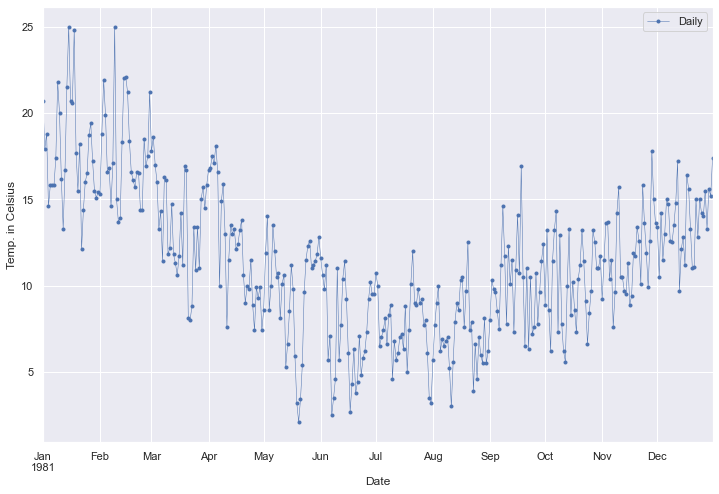

In [57]:
# Plotting the range of months from year 1981 to understand the seasons in Australia.
ax = tmpdf1.loc['1981', 'Temp'].plot(marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.set_ylabel("Temp. in Celsius")
ax.legend()
plt.show();

Australian Seasons and their monthly temperatures:

- Since Australia is on the Southern Hemisphere, the seasonal changes are opposite from that of the Northern Hemishere. Hence we can see low minimum temperatures during the months of May to September with May to August being the coldest months where the minimum temperatures shows <5 degree celsius going upto around 10 degree celsius.

- The minimum temperature starts climbing from October onwards until about April. The hottest months being January to March where minimum lower bound stays around 15 degree celsius and upper bounds going upto approximately 25 degree celsius.

Now that we know about the seasons let's look at the seasonality component of out dataset, by plotting a small range of years between 1981 to 1984.

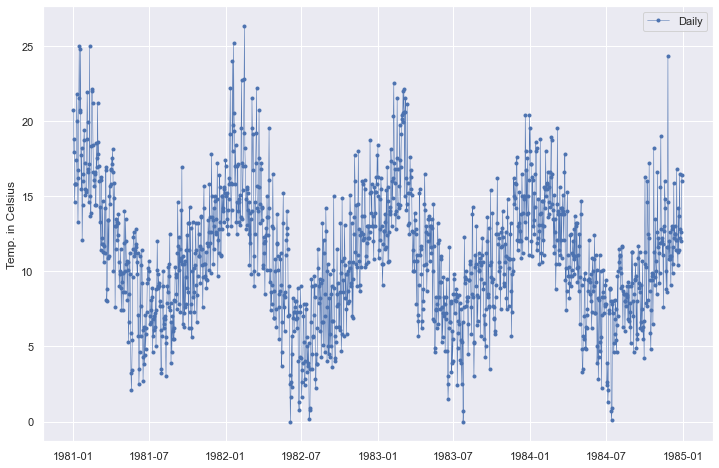

In [55]:
# Plotting a shorter range from 1981 to 1984
start, end = '1981-01-01', '1984-12-31'
fig, ax = plt.subplots()
ax.plot(tmpdf1.loc[start:end, 'Temp'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.set_ylabel("Temp. in Celsius")
ax.legend()
plt.show();

Plotting the minimum temperature over a range of four years (from 1981 up to 1984) help us understand the periodic seasonality better. Our next component to check is trend.

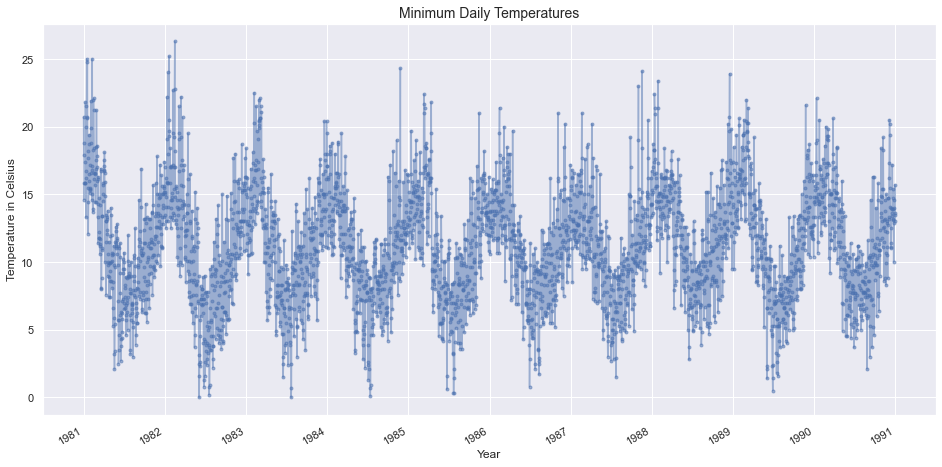

In [42]:
# Plotting our time-series to check trend
plt.figure(figsize=(16,8))
tmpdf1['Temp'].plot(marker='.', alpha=0.5, linestyle=None)
plt.xlabel('Year')
plt.ylabel("Temperature in Celsius")
plt.title("Minimum Daily Temperatures", fontsize=14)
plt.show();

In viewing the above plot we can see a decreasing trend in the upper bound of the minimum temperatures per year, although it's not very clear:

- Going from 1981 to 1991 there is a trend we can observe, where the upper bound of minimum temperature from year 1981 to 1991 is slowly decreasing from being approximately 25 degree celsius to approximately 20 degree celsius. This includes several irregular variations.

- We can also observe that for most of the decade from 1981 to 1991 the lower bounds of minimum temperatures (during colder months) have been close to 0 degree celsius with slight increase in years 1981, 1987, 1988 and 1991 (four years)

Next, we will use monthly averages to plot and observe the trend again.

Monthly averages can be done by using *resample* function to group the time-series into one month size buckets and getting the mean per month using start of each month.

In [67]:
# Resample and get mean temp for each month
tmpmean = tmpdf1['Temp'].resample('MS').mean()
tmpmean.head()

Date
1981-01-01    17.712903
1981-02-01    17.678571
1981-03-01    13.500000
1981-04-01    12.356667
1981-05-01     9.490323
Freq: MS, Name: Temp, dtype: float64

# Additive and Multiplicative Time Series

Our time series visualization consist of the following components: Base Level + Trend + Seasonality + Error 

- Depending on the nature of trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed either as a sum or a product of the components.

Additive time series:
- Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
- Value = Base Level x Trend x Seasonality x Error

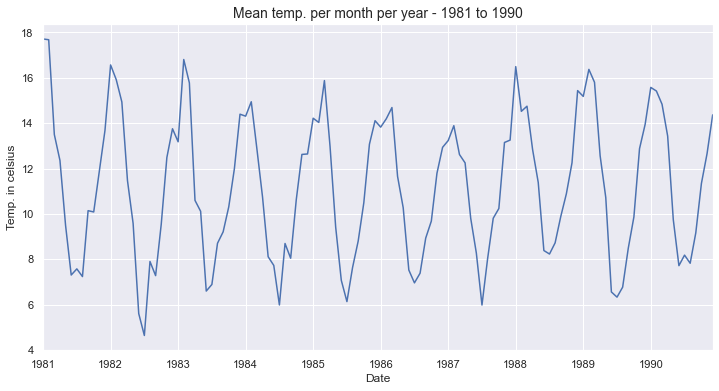

In [71]:
# Plot our customised time-series with mean temperature per month, bucketed by months
plt.figure(figsize=(12, 6))
tmpmean.plot()
plt.ylabel('Temp. in celsius')
plt.title('Mean temp. per month per year - 1981 to 1990', fontsize=14)
plt.show();

The seasonality pattern of decreasing upper bound minimum temperature per year can be better observed in the above plot than before. 

# Time-Series Decomposition

We can also visualize our data using a method called time-series decomposition. Time series decomposition allows us to decompose our time series into the components: trend, seasonality, and noise (residual error) which helps to identify changing mean or variation easily.

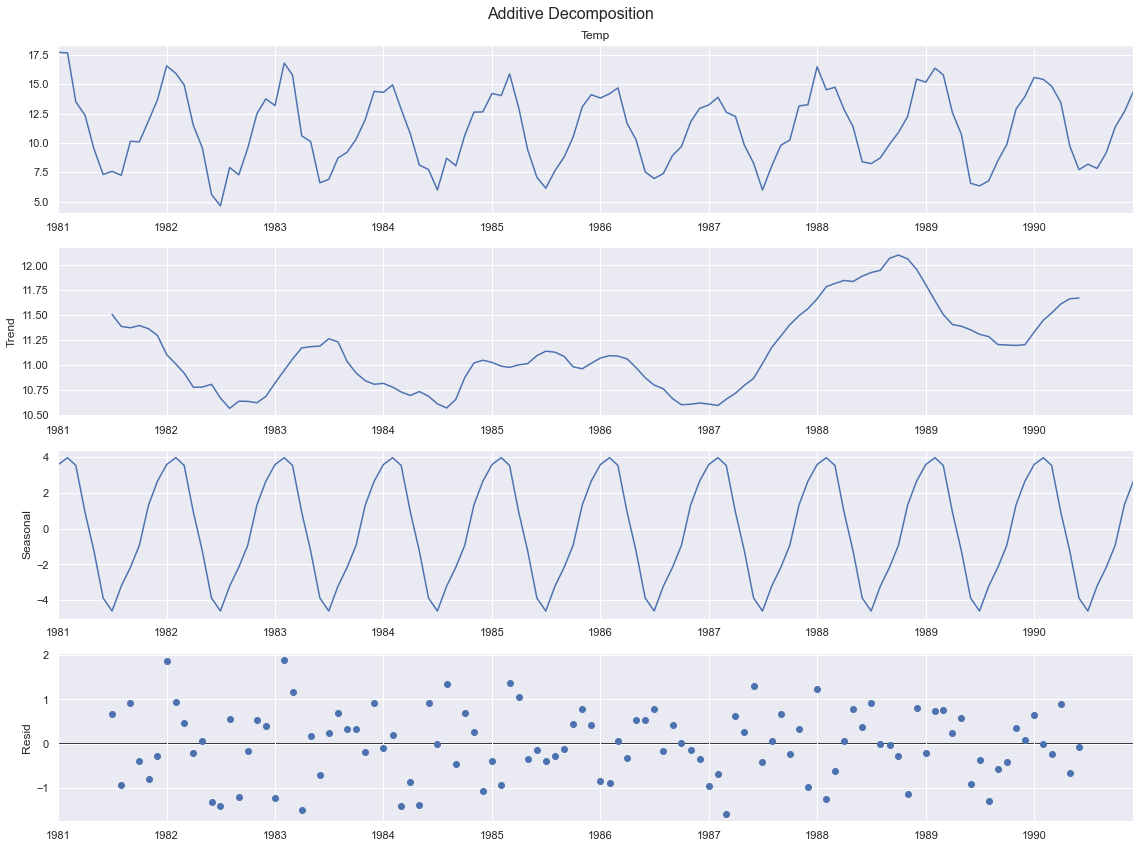

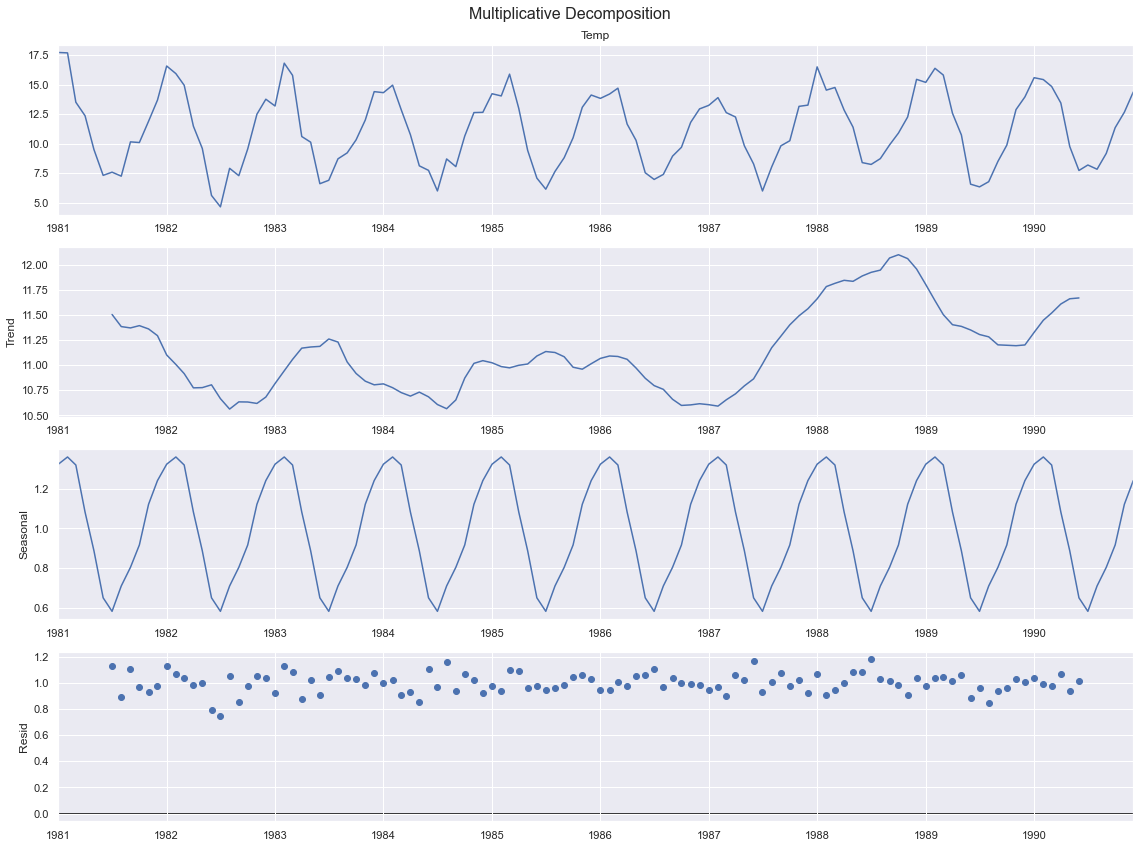

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

#sns.set(rc={'figure.figsize': (12,10)})

add_decomposition = seasonal_decompose(tmpmean, model='additive')

multi_decomposition = seasonal_decompose(tmpmean, model='multiplicative')

plt.rcParams.update({'figure.figsize': (16,12)})
add_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout()


plt.rcParams.update({'figure.figsize': (16,12)})
multi_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout()


plt.show();

Since the seasonal variation is independent of the trend and the residual error looks more random, we will use Additive Decomposition.

# Time-Series Forecasting with ARIMA

We will apply the ARIMA model for our time-series forecasting. ARIMA stands for Auto-regressive Integrated Moving Average and ARIMA models are specified by 3 order parameters: (p, d, q) where,

__p__ is the order of the AR or Autoregressive term. It refers to the number of lags of Y to be used as predictors.
__d__ is the number of differencing required to make the time series stationary. The most common approach to make the series stationary is to difference it. That is, subtract the previous value from the current value.
__q__ is the order of the MA or Moving Average term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.


An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.
We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.



# Order of Differencing (d)


### Reasons to convert a non-stationary series into stationary one before forecasting

- Forecasting a stationary series is relatively easy and the forecasts are more reliable.
- Autoregressive forecasting models are essentially linear regression models that utilize the lag of the series itself as predictors and it works best if there is no correlation between the predictors.

How to find if the series is stationary or not and the right order of differencing. If the series is stationary order of difference is not required or d=0. We will use ADF (__Augmented Dickey Fuller__) Test to find right order of differencing.

Null hypothesis: Non Stationarity exists in the series.

Alternative Hypothesis: Stationarity exists in the series

So, in our case, if p Value > 0.05 we reject null hypothesis and go ahead with finding the order of differencing.

In [81]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
X = tmpdf1['Temp'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.444805
p-value: 0.000247


Running the ADF test gives us a result of -4.444805. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). So we will use the value of differencing __d = 0__

# Find the order of the AR term (p)

### Autocorrelation and Partial Autocorrelation plot of Time-Series

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

C:\@Python\notebookhw\tool1hwvs_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


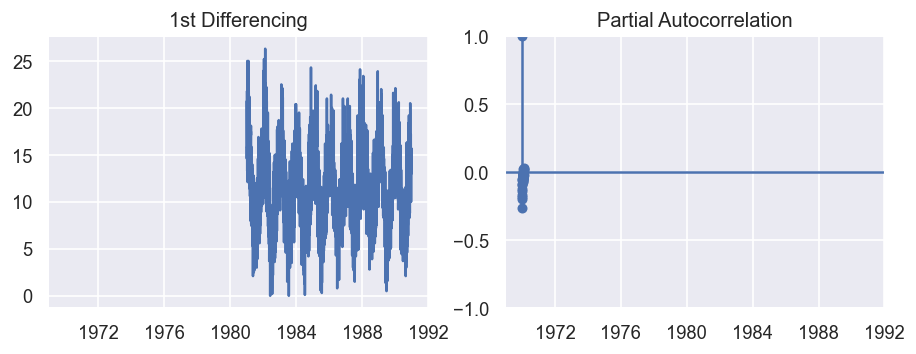

In [93]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(tmpdf1); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(tmpdf1.diff().dropna(), ax=axes[1])
plt.show()

We can see that the PACF lag 1 is quite significant since it is well above the significance line. So, we will fix the autoregression or p as 1.

# Find the order of the MA term (q)
Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

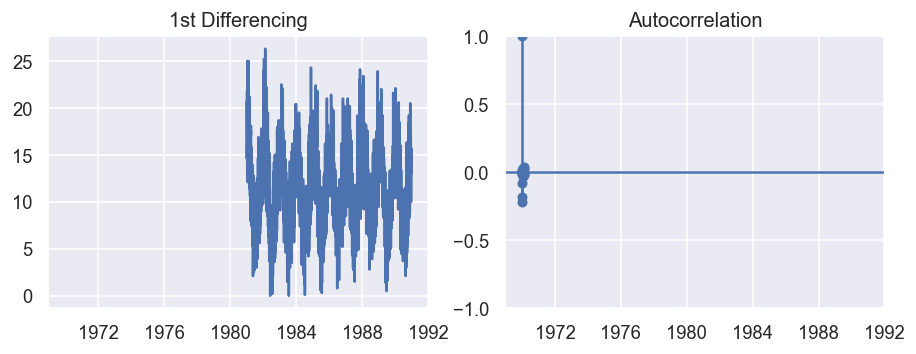

In [94]:
# ACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(tmpdf1); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_acf(tmpdf1.diff().dropna(), ax=axes[1])
plt.show()

We can see that one of the lag is well above the significance line. So, we will fix q or moving average as 1. 

Before fitting a model we should split the data into train and test sets.

In [104]:
TEST_SIZE = 36
train, test = tmpdf1.iloc[:-TEST_SIZE], tmpdf1.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0],tmpdf1.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((3614, 1), (3614,), (36, 1), (36,))

In [118]:
from statsmodels.tsa.arima.model import ARIMA

# Build a Model ARIMA(1,0,1)
model = ARIMA(train, order=(1,0,1))
model_fit = model.fit()
# Summary of fitted model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 3614
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8525.845
Date:                Fri, 24 Mar 2023   AIC                          17059.691
Time:                        18:23:34   BIC                          17084.461
Sample:                             0   HQIC                         17068.517
                               - 3614                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1656      0.241     46.325      0.000      10.693      11.638
ar.L1          0.8650      0.011     81.583      0.000       0.844       0.886
ma.L1         -0.2430      0.019    -12.614      0.0

The p-values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05). Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

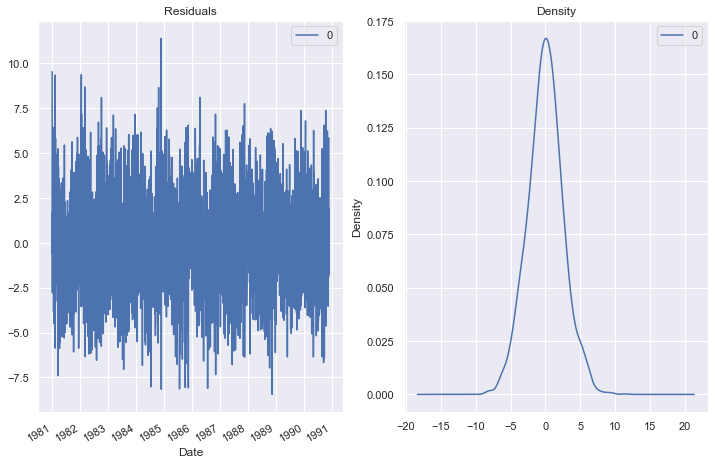

In [108]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(12,8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

 The residual error shows uniform variance. Let’s forecast and plot the actuals against the fitted forecast.

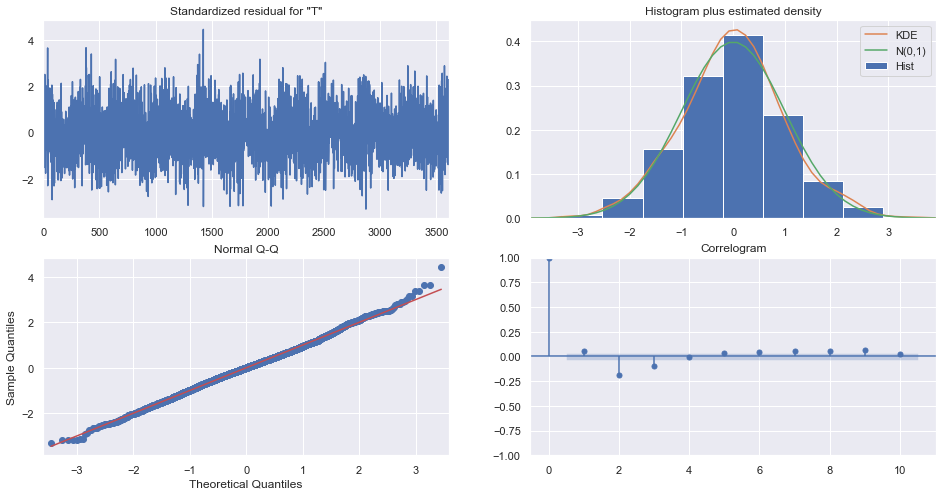

In [119]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

# Forecasting and Accuracy Metrics

It is not perfect, however, our model diagnostics suggests that the model residuals are normally distributed.

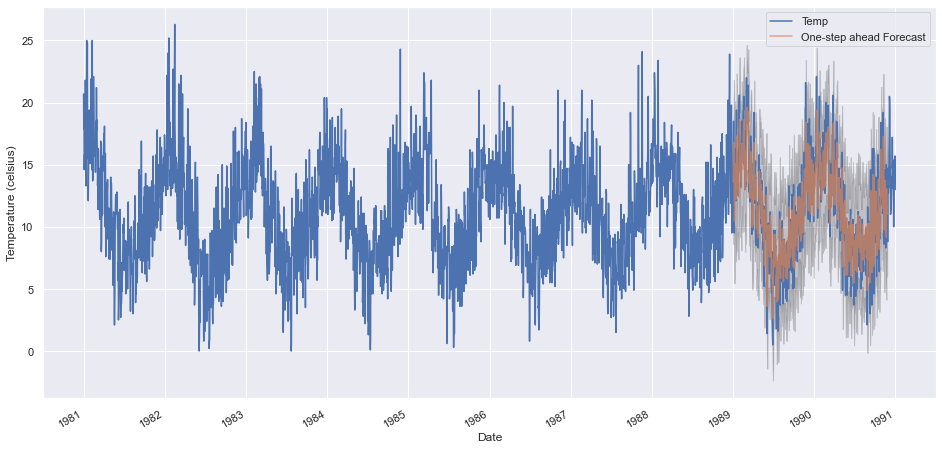

In [122]:
# Forecast

pred = model_fit.get_prediction(start=pd.to_datetime('1989-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = tmpdf1['1981':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 8))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (celsius)')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing the slight downward trend in temperature and captured the seasonality for each year.

Next we will look at the accuracy metrics. Common accuracy metrics are MSE and RMSE which we will calculate next.

In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

In [143]:
# MSE
y_forecasted = pred.predicted_mean
y_truth = tmpdf1['1989-01-01':]
mse = ((y_forecasted - y_truth['Temp']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5.6


In [145]:
# RMSE
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2.37


Both the MSE and RMSE numbers looks good and quite low which indicates that we have a good model.

# References:

https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python/notebook#16.-Autocorrelation-and-Partial-Autocorrelation-Functions-

https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting#11.-Accuracy-Metrics-for-Time-Series-Forecast-

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

Book: Practical-time-series-analysis-prediction-with-statistics-and-machine-learning - A book by Aileen Nielsen

https://online.stat.psu.edu/stat510/lesson/1/1.1
